In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


In [3]:
DATA_PATH = '/kaggle/input/attrition-rate/WA_Fn-UseC_-HR-Employee-Attrition (1).csv'

df = pd.read_csv(DATA_PATH)
df['AttritionFlag'] = df['Attrition'].map({'Yes':1,'No':0})

In [4]:
print('Shape:', df.shape)
print('\nFirst few rows:')
display(df.head())

Shape: (1470, 36)

First few rows:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AttritionFlag
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


In [5]:
print('\n--- Basic Information ---')
print(df.info())


--- Basic Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 1

In [6]:
print('\nMissing Values:')
print(df.isnull().sum().sort_values(ascending=False).head(10))


Missing Values:
Age                         0
Attrition                   0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
dtype: int64


In [7]:
print('\nNumeric Summary:')
display(df.describe().T)


Numeric Summary:


,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


<Figure size 600x400 with 0 Axes>

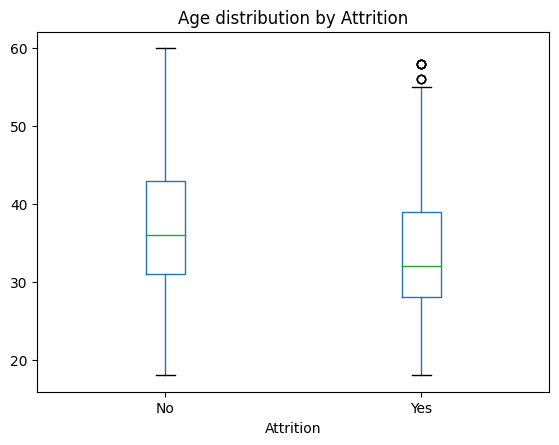

<Figure size 600x400 with 0 Axes>

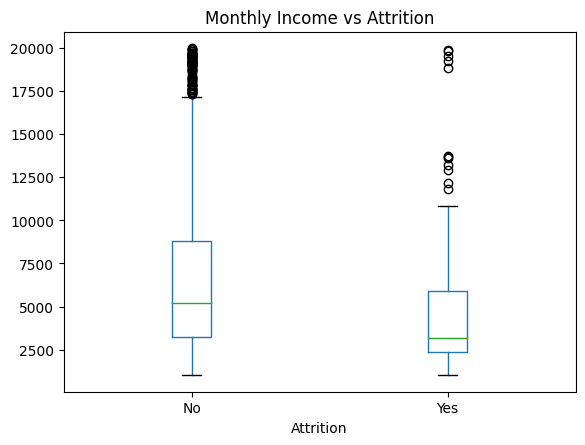

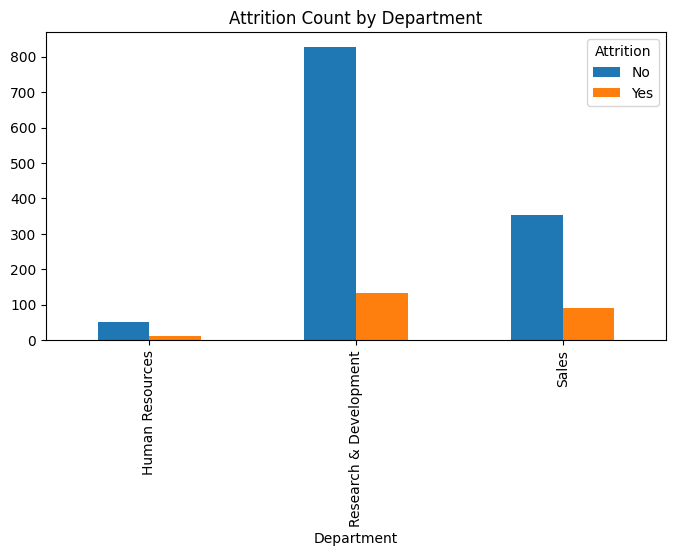

In [9]:
plt.figure(figsize=(6,4))
df.boxplot(column='Age', by='Attrition', grid=False)
plt.title('Age distribution by Attrition')
plt.suptitle('')
plt.show()

plt.figure(figsize=(6,4))
df.boxplot(column='MonthlyIncome', by='Attrition', grid=False)
plt.title('Monthly Income vs Attrition')
plt.suptitle('')
plt.show()

# Department-wise Attrition
dept_counts = df.groupby(['Department','Attrition']).size().unstack(fill_value=0)
dept_counts.plot(kind='bar', figsize=(8,4))
plt.title('Attrition Count by Department')
plt.show()


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


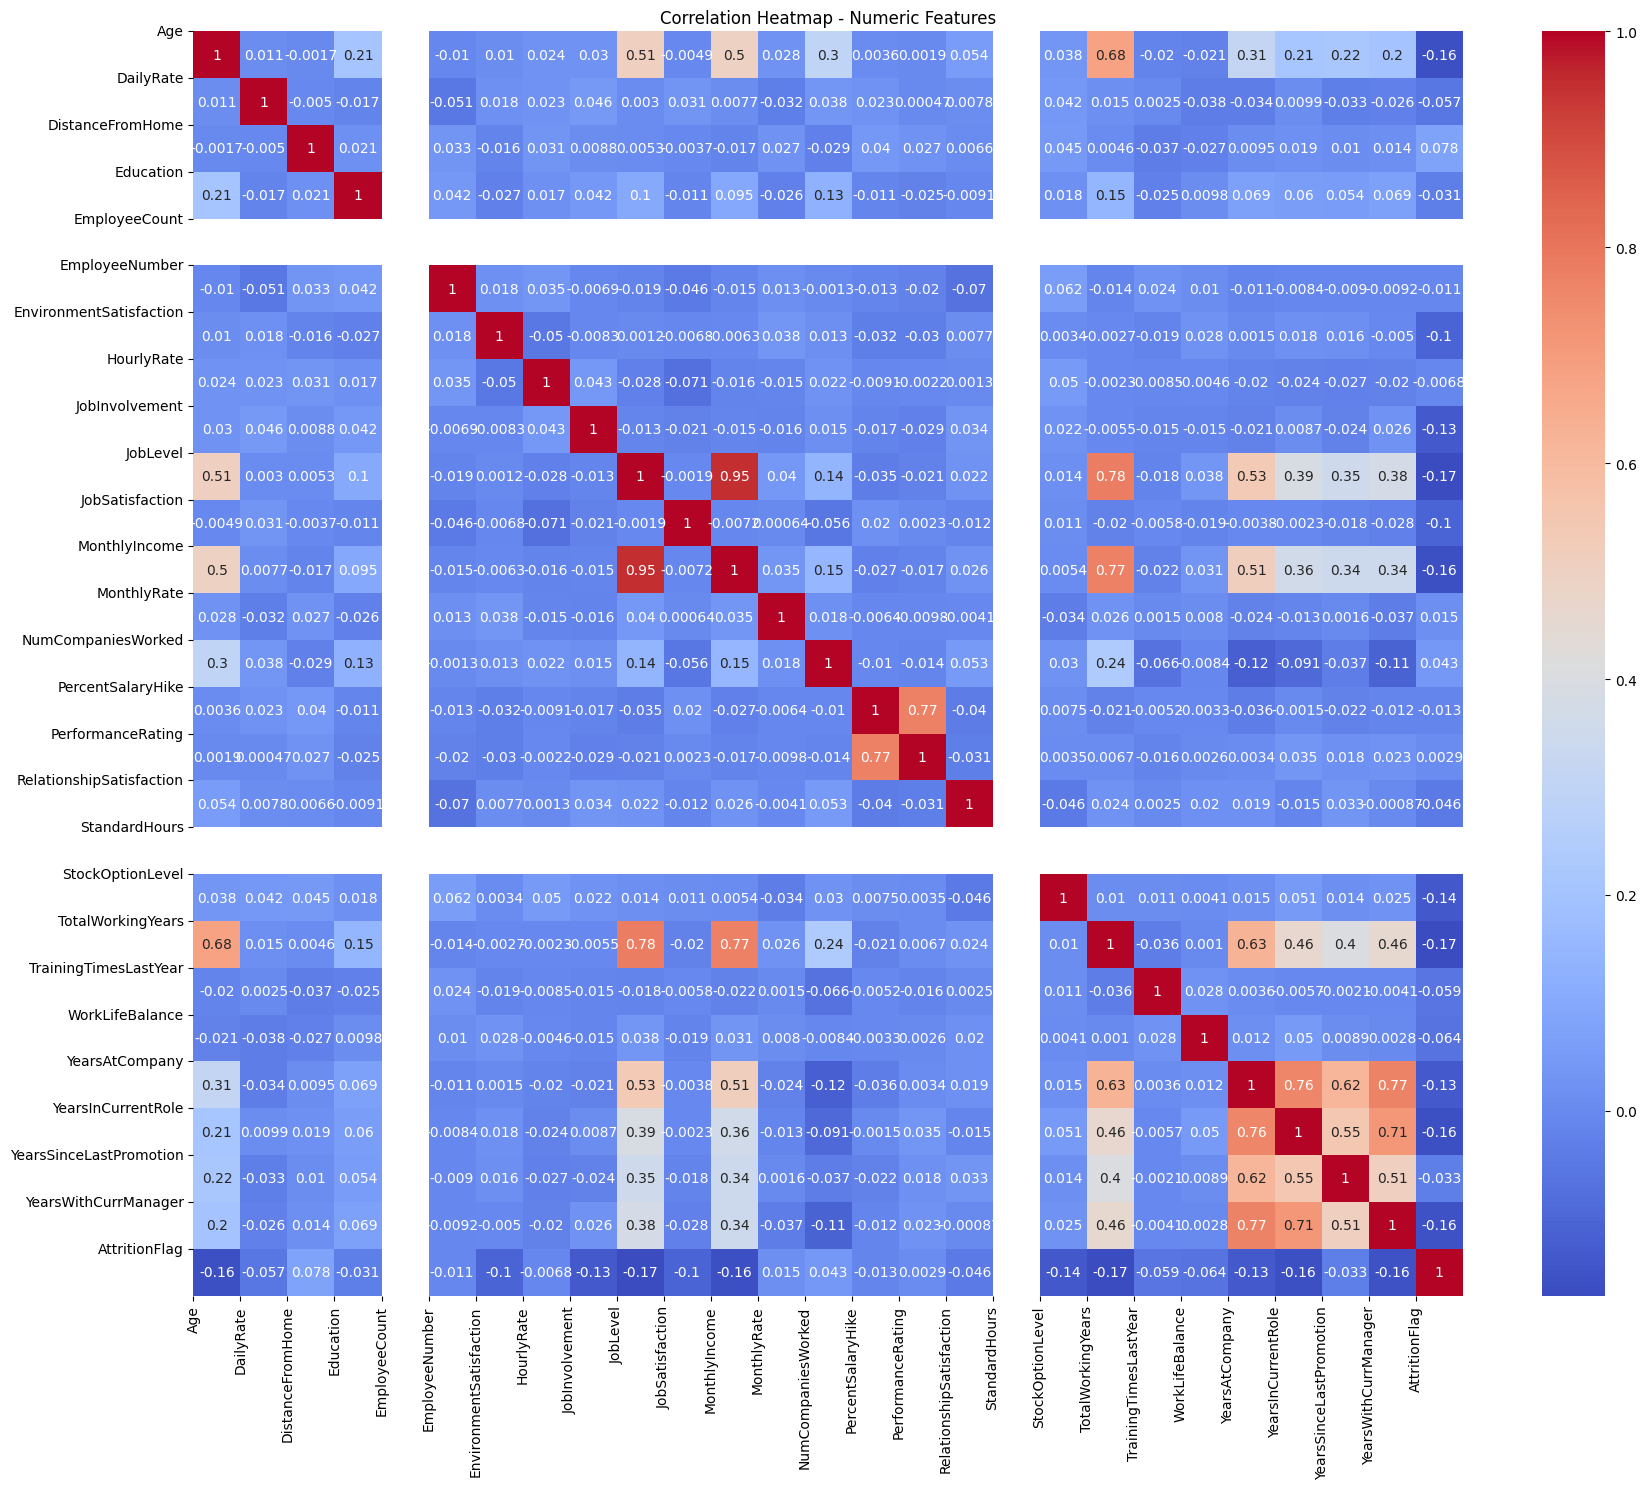

In [17]:
# Correlation heatmap
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr = df[num_cols].corr()
plt.figure(figsize=(18,15))
sns.heatmap(corr,annot = True, cmap='coolwarm')

plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.title('Correlation Heatmap - Numeric Features')
plt.tight_layout()
plt.show()

## Markdown
1. Younger employees tend to leave the company more often than older employees.
2. Lower monthly income is associated with higher chances of quitting.
3. The Sales department shows higher employee turnover than other departments.
4. Employees who have been with the company longer are less likely to leave.
5. Career growth and work-life balance likely influence decisions to stay or leave.


In [23]:
exclude = ['EmployeeNumber','EmployeeCount','Over18','StandardHours','Attrition','AttritionFlag']
features = [c for c in df.columns if c not in exclude]

numeric_features = df[features].select_dtypes(include=[np.number]).columns.tolist()
categorical_features = [c for c in features if c not in numeric_features]

numeric_transformer = Pipeline([('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())])
cat_transformer = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')), ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

preprocessor = ColumnTransformer([('num', numeric_transformer, numeric_features), ('cat', cat_transformer, categorical_features)])

X = df[features]
y_class = df['AttritionFlag']
y_reg = df['MonthlyIncome']

X_train, X_test, y_class_train, y_class_test, y_reg_train, y_reg_test = train_test_split(
    X, y_class, y_reg, test_size=0.2, random_state=42, stratify=y_class)

print('\nTrain/Test Split Complete')
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)


Train/Test Split Complete
Train shape: (1176, 30) Test shape: (294, 30)


In [19]:
regressors = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(max_iter=5000),
    'ElasticNet': ElasticNet(max_iter=5000)
}

reg_params = {
    'Ridge': {'alpha': [0.1, 1.0, 10.0]},
    'Lasso': {'alpha': [0.01, 0.1, 1.0]},
    'ElasticNet': {'alpha': [0.1, 1.0], 'l1_ratio': [0.5]}
}

classifiers = {
    'LogisticRegression': LogisticRegression(max_iter=2000),
    'DecisionTree': DecisionTreeClassifier(random_state=42)
}

class_params = {
    'LogisticRegression': {'C': [0.1, 1.0]},
    'DecisionTree': {'max_depth': [5,7,9], 'min_samples_split':[2,5]}
}

In [20]:
def train_and_evaluate_regressors(X_train, y_train, X_test, y_test, models, params, preprocessor, cv=3):
    results = {}
    for name, model in models.items():
        print(f'\nTraining Regressor: {name}')
        pipe = Pipeline([('pre', preprocessor), ('model', model)])
        pgrid = {f'model__{k}': v for k, v in params.get(name, {}).items()}
        if pgrid:
            gs = GridSearchCV(pipe, pgrid, cv=cv, scoring='neg_root_mean_squared_error', n_jobs=-1)
            gs.fit(X_train, y_train)
            best = gs.best_estimator_
            preds = best.predict(X_test)
            rmse = mean_squared_error(y_test, preds, squared=False)
            r2 = r2_score(y_test, preds)
            print('Best Params:', gs.best_params_, '| RMSE:', round(rmse,3), '| R2:', round(r2,3))
            results[name] = {'rmse': rmse, 'r2': r2, 'preds': preds}
        else:
            pipe.fit(X_train, y_train)
            preds = pipe.predict(X_test)
            rmse = mean_squared_error(y_test, preds, squared=False)
            r2 = r2_score(y_test, preds)
            print('RMSE:', round(rmse,3), '| R2:', round(r2,3))
            results[name] = {'rmse': rmse, 'r2': r2, 'preds': preds}
    return results


In [21]:
def train_and_evaluate_classifiers(X_train, y_train, X_test, y_test, models, params, preprocessor, cv=3):
    results = {}
    for name, model in models.items():
        print(f'\nTraining Classifier: {name}')
        pipe = Pipeline([('pre', preprocessor), ('model', model)])
        pgrid = {f'model__{k}': v for k, v in params.get(name, {}).items()}
        if pgrid:
            gs = GridSearchCV(pipe, pgrid, cv=cv, scoring='f1', n_jobs=-1)
            gs.fit(X_train, y_train)
            best = gs.best_estimator_
            preds = best.predict(X_test)
        else:
            pipe.fit(X_train, y_train)
            preds = pipe.predict(X_test)
        acc = accuracy_score(y_test, preds)
        prec = precision_score(y_test, preds)
        rec = recall_score(y_test, preds)
        f1s = f1_score(y_test, preds)
        print(f'Accuracy: {acc:.3f} | Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1s:.3f}')
        results[name] = {'acc': acc, 'precision': prec, 'recall': rec, 'f1': f1s, 'preds': preds}
    return results

In [24]:
reg_results = train_and_evaluate_regressors(X_train, y_reg_train, X_test, y_reg_test, regressors, reg_params, preprocessor)
clf_results = train_and_evaluate_classifiers(X_train, y_class_train, X_test, y_class_test, classifiers, class_params, preprocessor)

print('\n--- Regression Model Results ---')
for k,v in reg_results.items():
    print(f'{k}: RMSE={v["rmse"]:.3f}, R2={v["r2"]:.3f}')

print('\n--- Classification Model Results ---')
for k,v in clf_results.items():
    print(f'{k}: Accuracy={v["acc"]:.3f}, F1={v["f1"]:.3f}')


Training Regressor: LinearRegression
RMSE: 0.0 | R2: 1.0

Training Regressor: Ridge
Best Params: {'model__alpha': 0.1} | RMSE: 1.53 | R2: 1.0

Training Regressor: Lasso
Best Params: {'model__alpha': 0.01} | RMSE: 0.514 | R2: 1.0

Training Regressor: ElasticNet
Best Params: {'model__alpha': 0.1, 'model__l1_ratio': 0.5} | RMSE: 368.68 | R2: 0.994

Training Classifier: LogisticRegression
Accuracy: 0.861 | Precision: 0.615 | Recall: 0.340 | F1: 0.438

Training Classifier: DecisionTree
Accuracy: 0.830 | Precision: 0.452 | Recall: 0.298 | F1: 0.359

--- Regression Model Results ---
LinearRegression: RMSE=0.000, R2=1.000
Ridge: RMSE=1.530, R2=1.000
Lasso: RMSE=0.514, R2=1.000
ElasticNet: RMSE=368.680, R2=0.994

--- Classification Model Results ---
LogisticRegression: Accuracy=0.861, F1=0.438
DecisionTree: Accuracy=0.830, F1=0.359


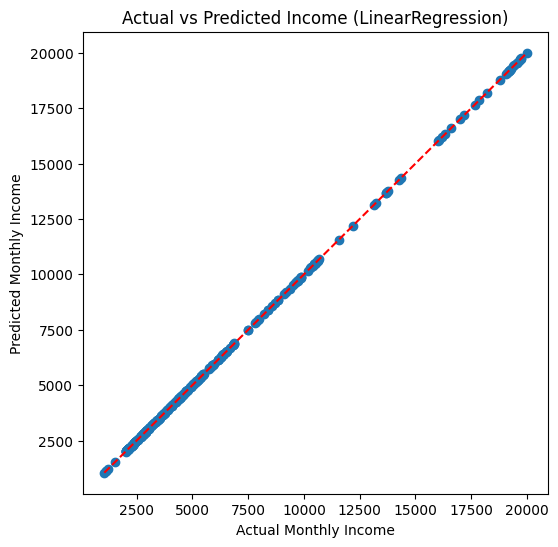

In [25]:
# Regression: Predicted vs Actual for best model
best_reg = min(reg_results.keys(), key=lambda k: reg_results[k]['rmse'])
plt.figure(figsize=(6,6))
plt.scatter(y_reg_test, reg_results[best_reg]['preds'])
plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'r--')
plt.xlabel('Actual Monthly Income')
plt.ylabel('Predicted Monthly Income')
plt.title(f'Actual vs Predicted Income ({best_reg})')
plt.show()

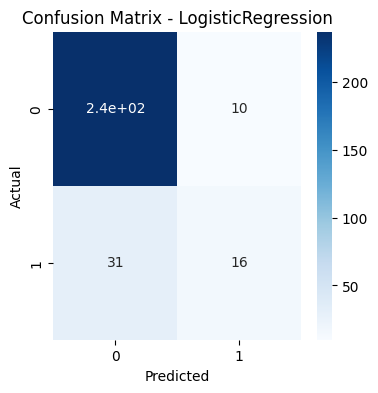

In [28]:
# Classification: Confusion Matrix for best classifier
best_clf = max(clf_results.keys(), key=lambda k: clf_results[k]['f1'])
cm = confusion_matrix(y_class_test, clf_results[best_clf]['preds'])
plt.figure(figsize=(4,4))
sns.heatmap(cm,annot=True, cmap='Blues')
plt.title(f'Confusion Matrix - {best_clf}')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

In [29]:
print(f'Best Regression Model: {best_reg} | RMSE: {reg_results[best_reg]["rmse"]:.3f}')
print(f'Best Classification Model: {best_clf} | F1 Score: {clf_results[best_clf]["f1"]:.3f}')

Best Regression Model: LinearRegression | RMSE: 0.000
Best Classification Model: LogisticRegression | F1 Score: 0.438
